<a href="https://colab.research.google.com/github/alanRiveros/machineLearning/blob/master/linearRegressionPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resaltado de sintaxis más enriquecido

Mejora en la asistencia para los idiomas añadidos:

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```

In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# Regresión Lineal

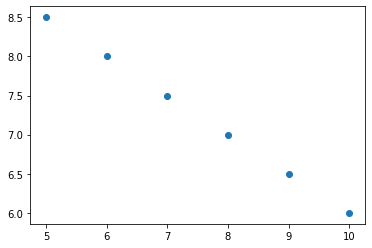

In [3]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)


In [9]:
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)
prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [10]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

tensor(0.0190, grad_fn=<MseLossBackward>)


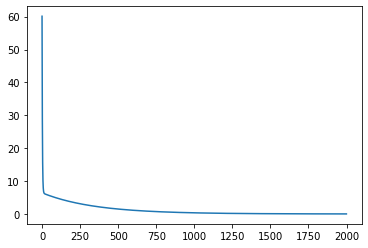

In [15]:
model = nn.Linear(1,1)

loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(loss)
plt.plot(range(iterations), losses)

In [16]:
x = torch.tensor([[4.0]])
p = model(x)
p

tensor([[8.6945]], grad_fn=<AddmmBackward>)